In [1]:
from keras import layers
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import merge, Convolution2D, Input

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


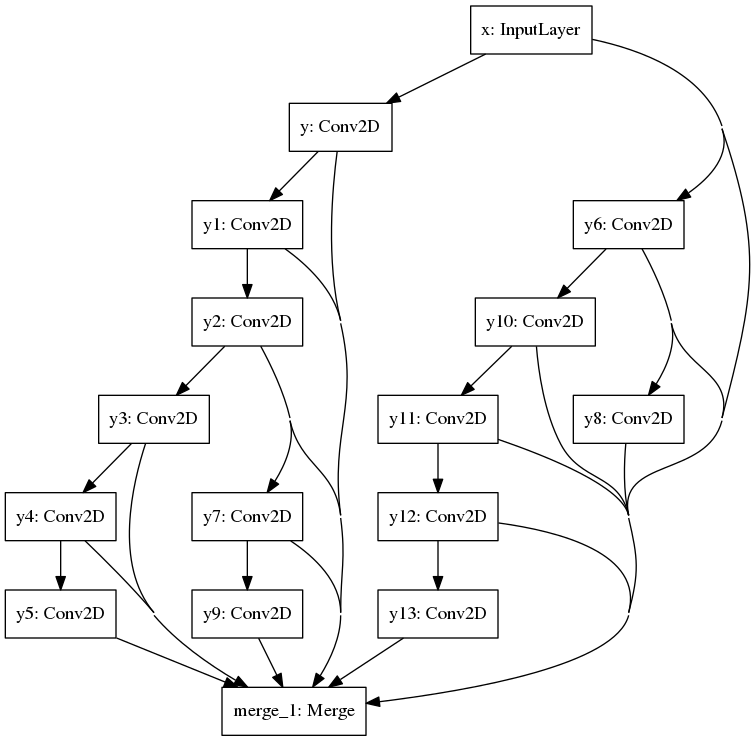

In [2]:
from IPython.display import Image
Image('WAZIRRESIDUAL.png')

In [3]:
# input tensor for a 3-channel 256x256 image
x = Input(shape=(3, 256, 256,), name='x')
# 3x3 conv with 3 output channels (same as input channels)
y = Convolution2D(256, 3,3, border_mode='same',name='y')(x)

y1 = Convolution2D(256, 3,3, border_mode='same',name='y1')(y)

y2 = Convolution2D(256, 3,3, border_mode='same',name='y2')(y1)

y3 = Convolution2D(256, 3,3, border_mode='same',name='y3')(y2)

y4 = Convolution2D(256, 3,3, border_mode='same',name='y4')(y3)

y5 = Convolution2D(256, 3,3, border_mode='same',name='y5')(y4)

y6 = Convolution2D(256, 3,3, border_mode='same',name='y6')(x)

y7 = Convolution2D(256, 3,3, border_mode='same',name='y7')(y2)
y8 = Convolution2D(256, 3,3, border_mode='same',name='y8')(y6)
y9 = Convolution2D(256, 3,3, border_mode='same',name='y9')(y7)
y10 = Convolution2D(256, 3,3, border_mode='same',name='y10')(y6)
y11 = Convolution2D(256, 3,3, border_mode='same',name='y11')(y10)
y12 = Convolution2D(256, 3,3, border_mode='same',name='y12')(y11)
y13 = Convolution2D(256, 3,3, border_mode='same',name='y13')(y12)
# this returns x + y.
z = merge([x, y,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13], mode='sum')
model=Model(x,z)

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), name="y", padding="same")`
  after removing the cwd from sys.path.
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), name="y1", padding="same")`
  
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), name="y2", padding="same")`
  
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), name="y3", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to 

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  (None, 3, 256, 256)  0                                            
__________________________________________________________________________________________________
y (Conv2D)                      (None, 3, 256, 256)  590080      x[0][0]                          
__________________________________________________________________________________________________
y1 (Conv2D)                     (None, 3, 256, 256)  590080      y[0][0]                          
__________________________________________________________________________________________________
y6 (Conv2D)                     (None, 3, 256, 256)  590080      x[0][0]                          
__________________________________________________________________________________________________
y2 (Conv2D

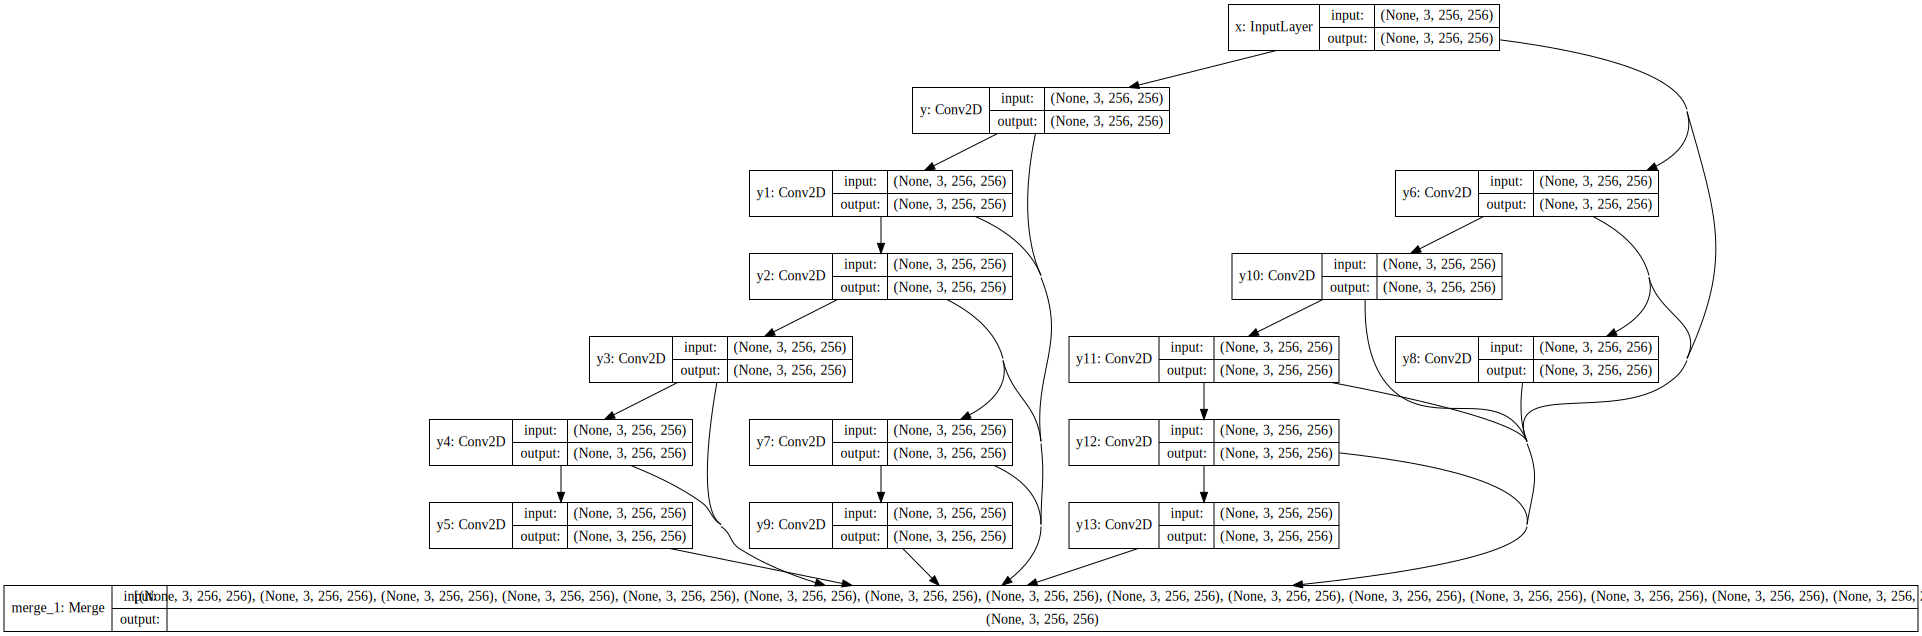

In [5]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
plot_model(model, to_file='WAZIRRESIDUAL.png')